In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
sns.set() # use seaborn plotting style

## Multinomial Naive Bayes Classifier

Code from https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a

In [ ]:
train_data = pd.read_csv('final_data/train.csv')
test_data = pd.read_csv('final_data/test.csv')

: 

In [ ]:
# look at entire row of data
pd.set_option('display.max_colwidth', None)
train_data.head()

,review,rating
0,"""This is the only medicine I have found that clears up my stuffy/runny nose, sneezing, itchy watery eyes. I&#039;ve tried several allergy pills and nasal sprays with no relief! The only problem is, doctors don&#039;t want to prescribe this medication because so many patients abuse it. I&#039;ve also taken this medicine for bronchitis and it worked wonders!""",1
1,"""Worked mildly well, but excellent when paired with a small dose of Trilafon.""",1
2,"""Insertion was not bad. For me it was fast and not painful at all. A week and a half later after insertion got my period. It lasted for two weeks. I had only one week without any bleeding when it started again. It lasted again for two weeks. After a week and a half I got my period again that lasted for 4 weeks now. Abundant period. Today after 2months and a few weeks I went to the doctor to take it out. I couldn&#039;t handle one day more. No pain at all when he took it out. Only good thing, periods were not painful. But I rather prefer pain for a few days and a 8 days period than an never ending painless period.""",0
3,"""Works wonders. I have my life back. The first two weeks were rough because of nausea and increased anxiety. It kicked in after three weeks or so and now six months later I&#039;m doing great.""",1
4,"""I have just finished my second week on Tri-Sprintec and my period hasn&#039;t stopped since. I have been getting more moody than I normally am and I almost had 3 anxiety attacks.""",0


: 

In [ ]:
# look at the distribution of the labels
train_data['rating'].value_counts()


1    101851
0     43316
Name: rating, dtype: int64

: 

In [ ]:
# percentage of positive reviews
train_data['rating'].value_counts(normalize=True)

1    0.701613
0    0.298387
Name: rating, dtype: float64

: 

In [ ]:
# number of total reviews
len(train_data)

145167

: 

In [ ]:
# look at the distribution of the labels for the test set
test_data['rating'].value_counts()

1    37559
0    16207
Name: rating, dtype: int64

: 

In [ ]:
# percentage of positive reviews
test_data['rating'].value_counts(normalize=True)

1    0.698564
0    0.301436
Name: rating, dtype: float64

: 

In [ ]:
# number of total reviews
len(test_data)

53766

: 

In [ ]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train_data.review, train_data.rating)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.review)

: 

In [ ]:
print(np.array(test_data.rating)[predicted_categories])

[1 1 1 ... 1 1 1]


: 

In [ ]:
# plot the confusion matrix
mat = confusion_matrix(test_data.rating, predicted_categories)
print(mat)

[[ 3005 13202]
 [  290 37269]]


: 

In [ ]:
# categories 
categories = train_data.rating.unique()
print(categories)

[1 0]


: 

In [ ]:
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=categories,yticklabels=categories)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
# title
plt.title("Naive Bayes Real Confusion Matrix")
plt.show()
# save the confusion matrix
plt.savefig('naive_bayes_real_confusion_matrix.png')

NameError: name 'sns' is not defined

: 

In [ ]:
print("The accuracy is {}".format(accuracy_score(test_data.rating, predicted_categories)))

The accuracy is 0.7490607447085519


: 

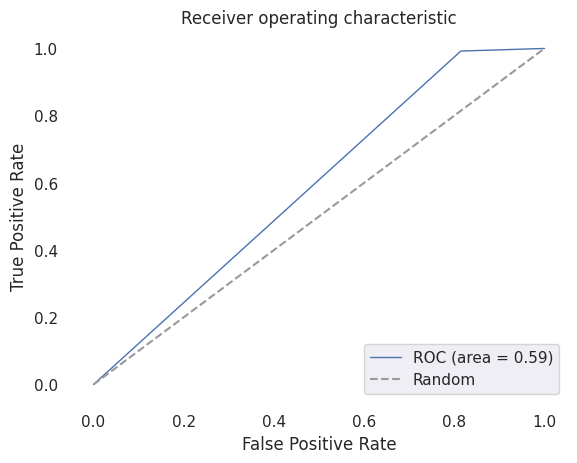

<Figure size 640x480 with 0 Axes>

: 

In [ ]:
# plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_data.rating, predicted_categories)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Real ROC Curve')
plt.legend(loc="lower right")
# set background color to white
ax = plt.gca()
ax.set_facecolor('white')
plt.show()
# save the ROC curve png
plt.savefig('naive_bayes_real_ROC.png')


In [ ]:
# get F1 score, precision, and recall
print(classification_report(test_data.rating, predicted_categories))

              precision    recall  f1-score   support

           0       0.91      0.19      0.31     16207
           1       0.74      0.99      0.85     37559

    accuracy                           0.75     53766
   macro avg       0.83      0.59      0.58     53766
weighted avg       0.79      0.75      0.68     53766



: 

In [ ]:
# print F1 score
print('F1 score: {}'.format(f1_score(test_data.rating, predicted_categories)))

# print precision
print('Precision score: {}'.format(precision_score(test_data.rating, predicted_categories)))

# print recall
print('Recall score: {}'.format(recall_score(test_data.rating, predicted_categories)))

F1 score: 0.846734067931387
Precision score: 0.7384240454914703
Recall score: 0.9922788146649272


: 

## Generate Synthetic Data

In [ ]:
# generate synthetic data from the model
def generate_data(model, categories, n_samples):
    # get the feature names
    feature_names = model.named_steps['tfidfvectorizer'].get_feature_names()
    # get the class priors
    class_priors = model.named_steps['multinomialnb'].class_log_prior_
    # get the class conditional
    class_conditional = model.named_steps['multinomialnb'].feature_log_prob_
    # get the number of features
    n_features = len(feature_names)
    # get the number of classes
    n_classes = len(categories)
    # generate the data
    data = []
    # choose the data based on the class priors
    for i in range(n_samples):
        # randomly choose a class
        category = np.random.choice(categories, p=np.exp(class_priors))
        # randomly choose the number of words
        n_words = np.random.randint(1, 100)
        # randomly choose the words based on the class conditional
        words = np.random.choice(feature_names, size=n_words, replace=True, p=np.exp(class_conditional[category]))
        # add the data
        data.append((category, " ".join(words)))
    # convert data to a pandas dataframe
    data = pd.DataFrame(data, columns=["rating", "review"])
    # return the data without the index
    return data


: 

In [ ]:
train_data.shape[0]

145167

: 

In [ ]:
int((train_data.shape[0])/4)

36291

: 

In [ ]:
# generate the data
n_samples = (int(train_data.shape[0]/4))
# update n_samples
synthetic_data = generate_data(model, categories, train_data.shape[0])

/home/codespace/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


KeyboardInterrupt: 

: 

In [ ]:
# save synthetic data to a csv file
synthetic_data.to_csv("final_data/synthetic_data.csv", index=False)

: 

In [ ]:
# load the synthetic data
synthetic_data = pd.read_csv("final_data/synthetic_data.csv")
# look at the distribution of the labels
synthetic_data['rating'].value_counts()
# percentage of positive reviews
synthetic_data['rating'].value_counts(normalize=True)

0    0.70071
1    0.29929
Name: rating, dtype: float64

: 

In [ ]:
# Train new model using the synthetic data
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the synthetic data
model.fit(synthetic_data.review, synthetic_data.rating)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.review)

: 

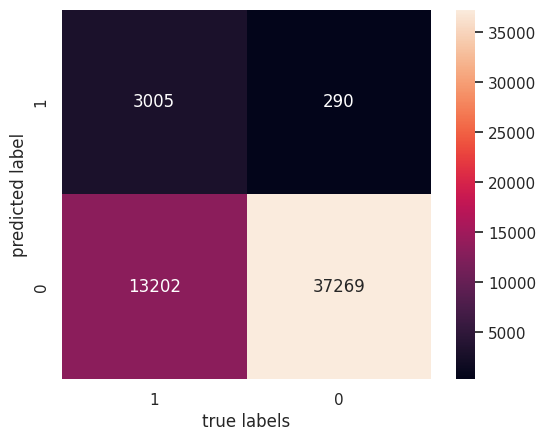

<Figure size 640x480 with 0 Axes>

: 

In [ ]:
# Evaluate the model on the test data 
# plot the confusion matrix
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=categories,yticklabels=categories)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()
# title 
plt.title("Naive Bayes Synthetic Confusion Matrix")
# save the confusion matrix
plt.savefig("naive_bayes_synthetic_confusion_matrix.png")

In [ ]:
# print the accuracy
print("The accuracy is {}".format(accuracy_score(test_data.rating, predicted_categories)))

The accuracy is 0.6028531041922405


: 

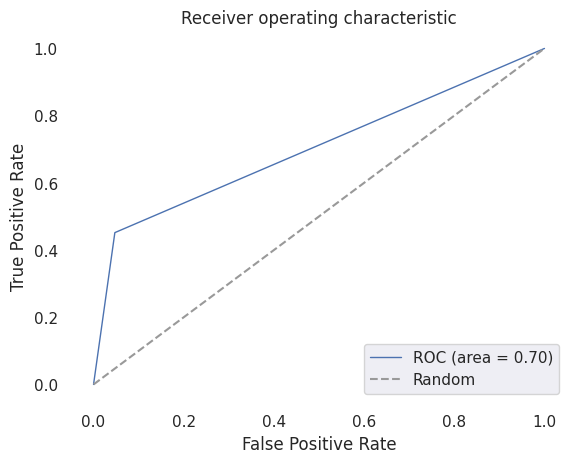

<Figure size 640x480 with 0 Axes>

: 

In [ ]:
# get ROC curve
fpr, tpr, thresholds = roc_curve(test_data.rating, predicted_categories)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('Naive Bayes Synthetic ROC Curve')
plt.legend(loc="lower right")
# set background color to white
ax = plt.gca()
ax.set_facecolor('white')
plt.show()
# save the ROC curve
plt.savefig("naive_bayes_synthetic_ROC.png")

In [ ]:
# print F1 score
print('F1 score: {}'.format(f1_score(test_data.rating, predicted_categories)))

# print precision
print('Precision score: {}'.format(precision_score(test_data.rating, predicted_categories)))

# print recall
print('Recall score: {}'.format(recall_score(test_data.rating, predicted_categories)))

F1 score: 0.6138488525598134
Precision score: 0.9568158755214793
Recall score: 0.45187571554088235


: 

In [ ]:
# for nerual network a lot lower 
# generated sentences don't make sense

: 